In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from fbm import FBM # Fractional Brownian Motion
from tqdm.auto import tqdm # Visualizing loops

In [2]:
def quadratic_variation(B):
    return np.cumsum(np.power(np.diff(B, axis=0, prepend=0.), 2), axis=0)

def normalized_p_variation(t_L, X_L, t_K, X_K, p): # Roughness statistic from "Rough Volatility: Fact or Artefact?" (Cont and Das, 2022).
    W = 0
    aux_num = np.abs(np.diff(X_K))**p
    aux_den = np.abs(np.diff(X_L))

    for i in range(0, t_K.size-1):
        start_idx = np.where(t_L == t_K[i])[0][0]
        end_idx = np.where(t_L == t_K[i + 1])[0][0]
        W += (aux_num[i] / np.sum((aux_den[start_idx:end_idx]**p))) * (t_K[i + 1] - t_K[i])
    
    return W

## Brownian motion and quadratic variation

Normalized p variation statistic W: 0.9496243216528913


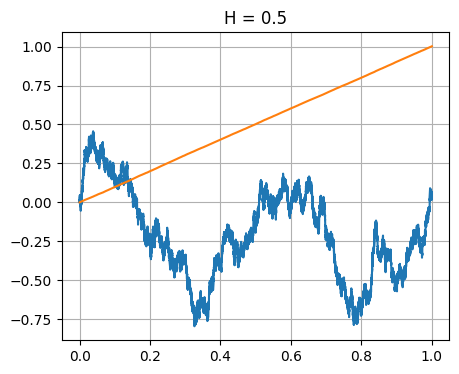

In [3]:
n_points = 300*300
H = 0.5
T = 1
K_step = int(np.sqrt(n_points))

f = FBM(n = n_points, hurst = H, length = T, method = 'daviesharte')
fbm = f.fbm()

X_L = fbm
t_L = f.times()
X_K = X_L[np.arange(0, t_L.size, K_step)] 
t_K = t_L[np.arange(0, t_L.size, K_step)]

p = 2

W = normalized_p_variation(t_L, X_L, t_K, X_K, p)
print('Normalized p variation statistic W: ' + str(W))

plt.figure(figsize=(5,4))
plt.plot(f.times(), fbm, f.times(), quadratic_variation(fbm))
plt.title('H = ' + str(H))
plt.grid()
plt.show()
# print(X_L.shape, t_L.shape, X_K.shape, t_K.shape)
# print(X_L[-1], t_L[-1], X_K[-1], t_K[-1])

# Figure 1 paper

# H = 0.1

In [4]:
np.random.seed(1885)

n_points = 300*300
H = 0.1
T = 1
K_step = int(np.sqrt(n_points))

f = FBM(n = n_points, hurst = H, length = T, method = 'daviesharte')
fbm = f.fbm()

X_L = fbm 
t_L = f.times()
X_K = X_L[np.arange(0, t_L.size, K_step)]
t_K = t_L[np.arange(0, t_L.size, K_step)]

p_vals = np.logspace(np.log10(1/0.2), np.log10(1/0.04), 50) # logspace in this case
W_vals = np.zeros(p_vals.size)

for i in range(p_vals.size):
    W_vals[i] = normalized_p_variation(t_L, X_L, t_K, X_K, p_vals[i])

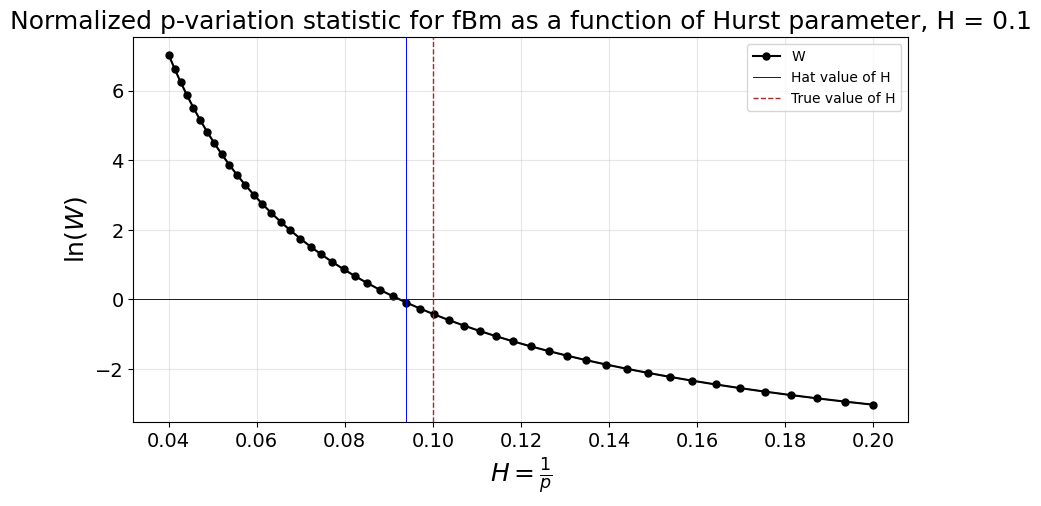

In [5]:
plt.figure(figsize=(10,5))
plt.plot(1/p_vals, np.log(W_vals), linewidth = 1)
plt.plot(1/p_vals, np.log(W_vals), marker = '.', markersize = 10, color = 'black', label = 'W')
plt.axhline(y = 0, color = 'blue', linestyle = '-', linewidth = 0.7, label = 'Hat value of H')
plt.axvline(x = H, color = 'brown', linestyle = '--', linewidth = 1, label = 'True value of H')
plt.axvline(x = 1/p_vals[np.argmin(np.abs(np.log(W_vals)))], color = 'blue', linestyle = '-', linewidth = 0.7)

plt.title('Normalized p-variation statistic for fBm as a function of Hurst parameter, H = ' + str(H), fontsize = 18)
plt.grid(alpha = 0.3)
plt.ylabel(r'$\ln(W) $', fontsize = 18)
plt.xlabel(r'$H = \frac{1}{p}$', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.legend(loc = 'upper right')

# plt.savefig('H0_1.png', bbox_inches='tight')

plt.show()

# H = 0.3

In [6]:
np.random.seed(104)

n_points = 300*300
H = 0.3
T = 1
K_step = int(np.sqrt(n_points))

f = FBM(n = n_points, hurst = H, length = T, method = 'daviesharte')
fbm = f.fbm()

X_L = fbm 
t_L = f.times()
X_K = X_L[np.arange(0, t_L.size, K_step)]
t_K = t_L[np.arange(0, t_L.size, K_step)]

p_vals = np.linspace(1/0.4, 1/0.2, 50)
W_vals = np.zeros(p_vals.size)

for i in range(p_vals.size):
    W_vals[i] = normalized_p_variation(t_L, X_L, t_K, X_K, p_vals[i])

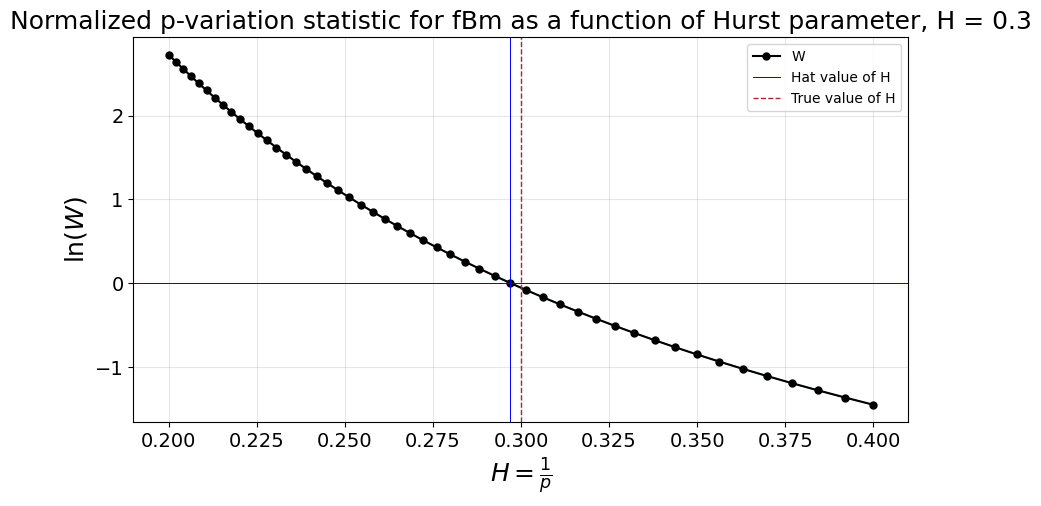

In [7]:
plt.figure(figsize=(10,5))
plt.plot(1/p_vals, np.log(W_vals), linewidth = 1)
plt.plot(1/p_vals, np.log(W_vals), marker = '.', markersize = 10, color = 'black', label = 'W')
plt.axhline(y = 0, color = 'blue', linestyle = '-', linewidth = 0.7, label = 'Hat value of H')
plt.axvline(x = H, color = 'brown', linestyle = '--', linewidth = 1, label = 'True value of H')
plt.axvline(x = 1/p_vals[np.argmin(np.abs(np.log(W_vals)))], color = 'blue', linestyle = '-', linewidth = 0.7)

plt.title('Normalized p-variation statistic for fBm as a function of Hurst parameter, H = ' + str(H), fontsize = 18)
plt.grid(alpha = 0.3)
plt.ylabel(r'$\ln(W) $', fontsize = 18)
plt.xlabel(r'$H = \frac{1}{p}$', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.legend(loc = 'upper right')

# plt.savefig('H0_3.png', bbox_inches='tight')

plt.show()

# H = 0.5

In [8]:
np.random.seed(104)

n_points = 300*300
H = 0.5
T = 1
K_step = int(np.sqrt(n_points))

f = FBM(n = n_points, hurst = H, length = T, method = 'daviesharte')
fbm = f.fbm()

X_L = fbm 
t_L = f.times()
X_K = X_L[np.arange(0, t_L.size, K_step)]
t_K = t_L[np.arange(0, t_L.size, K_step)]

p_vals = np.linspace(1/0.6, 1/0.4, 50)
W_vals = np.zeros(p_vals.size)

for i in range(p_vals.size):
    W_vals[i] = normalized_p_variation(t_L, X_L, t_K, X_K, p_vals[i])

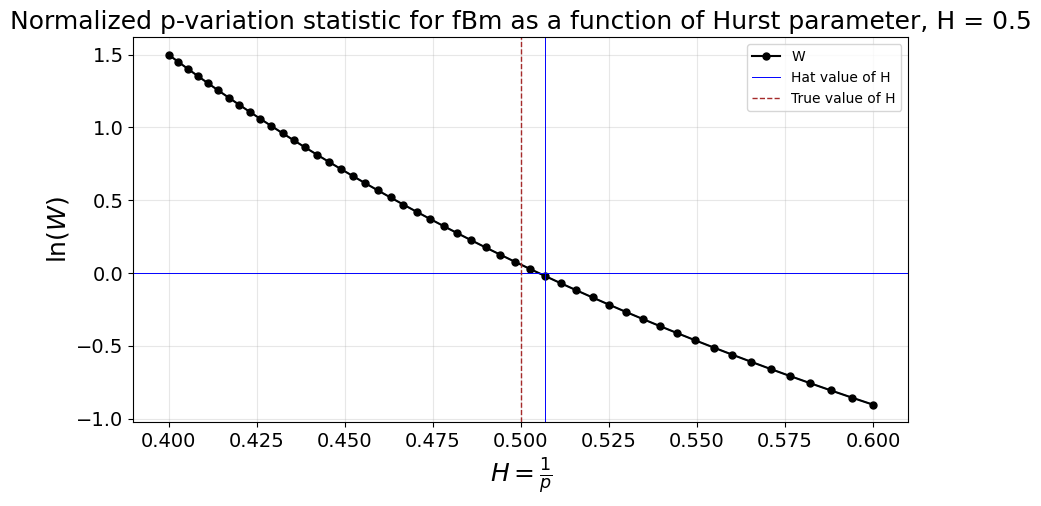

In [9]:
plt.figure(figsize=(10,5))
plt.plot(1/p_vals, np.log(W_vals), linewidth = 1)
plt.plot(1/p_vals, np.log(W_vals), marker = '.', markersize = 10, color = 'black', label = 'W')
plt.axhline(y = 0, color = 'blue', linestyle = '-', linewidth = 0.7, label = 'Hat value of H')
plt.axvline(x = H, color = 'brown', linestyle = '--', linewidth = 1, label = 'True value of H')
plt.axvline(x = 1/p_vals[np.argmin(np.abs(np.log(W_vals)))], color = 'blue', linestyle = '-', linewidth = 0.7)

plt.title('Normalized p-variation statistic for fBm as a function of Hurst parameter, H = ' + str(H), fontsize = 18)
plt.grid(alpha = 0.3)
plt.ylabel(r'$\ln(W) $', fontsize = 18)
plt.xlabel(r'$H = \frac{1}{p}$', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.legend(loc = 'upper right')

# plt.savefig('H0_5.png', bbox_inches='tight')

plt.show()

# H = 0.8

In [10]:
np.random.seed(10034)

n_points = 300*300
H = 0.8
T = 1
K_step = int(np.sqrt(n_points))

f = FBM(n = n_points, hurst = H, length = T, method = 'daviesharte')
fbm = f.fbm()

X_L = fbm 
t_L = f.times()
X_K = X_L[np.arange(0, t_L.size, K_step)]
t_K = t_L[np.arange(0, t_L.size, K_step)]

p_vals = np.linspace(1/0.9, 1/0.7, 50)
W_vals = np.zeros(p_vals.size)

for i in range(p_vals.size):
    W_vals[i] = normalized_p_variation(t_L, X_L, t_K, X_K, p_vals[i])

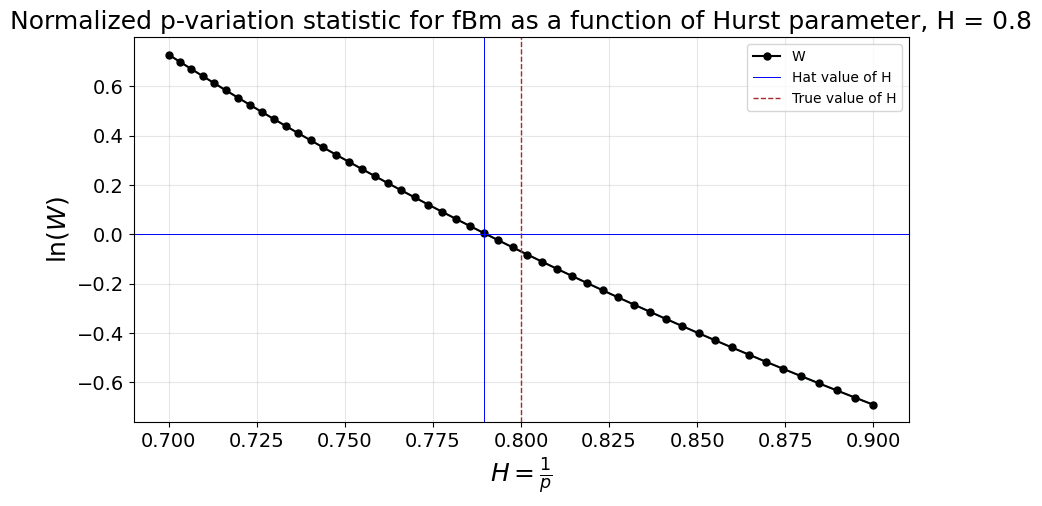

In [11]:
plt.figure(figsize=(10,5))
plt.plot(1/p_vals, np.log(W_vals), linewidth = 1)
plt.plot(1/p_vals, np.log(W_vals), marker = '.', markersize = 10, color = 'black', label = 'W')
plt.axhline(y = 0, color = 'blue', linestyle = '-', linewidth = 0.7, label = 'Hat value of H')
plt.axvline(x = H, color = 'brown', linestyle = '--', linewidth = 1, label = 'True value of H')
plt.axvline(x = 1/p_vals[np.argmin(np.abs(np.log(W_vals)))], color = 'blue', linestyle = '-', linewidth = 0.7)

plt.title('Normalized p-variation statistic for fBm as a function of Hurst parameter, H = ' + str(H), fontsize = 18)
plt.grid(alpha = 0.3)
plt.ylabel(r'$\ln(W) $', fontsize = 18)
plt.xlabel(r'$H = \frac{1}{p}$', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.legend(loc = 'upper right')

# plt.savefig('H0_8.png', bbox_inches='tight')

plt.show()

# Figure 2: Histograms

## H = 0.1

In [12]:
n_points = 300*300
H = 0.1
T = 1
K_step = int(np.sqrt(n_points))

n_samples = 5000
hist_result_01 = np.zeros(n_samples)

for j in tqdm(range(hist_result_01.size)):
    # print(j)
    f = FBM(n = n_points, hurst = H, length = T, method = 'daviesharte')
    fbm = f.fbm()
    
    X_L = fbm 
    t_L = f.times()
    X_K = X_L[np.arange(0, t_L.size, K_step)]
    t_K = t_L[np.arange(0, t_L.size, K_step)]
    
    p_vals = np.logspace(np.log10(1/0.18), np.log10(1/0.02), 100)
    W_vals = np.zeros(p_vals.size)
    
    for i in range(p_vals.size):
        W_vals[i] = normalized_p_variation(t_L, X_L, t_K, X_K, p_vals[i])

    hist_result_01[j] = 1/p_vals[np.argmin(np.abs(np.log(W_vals)))]

  0%|          | 0/5000 [00:00<?, ?it/s]

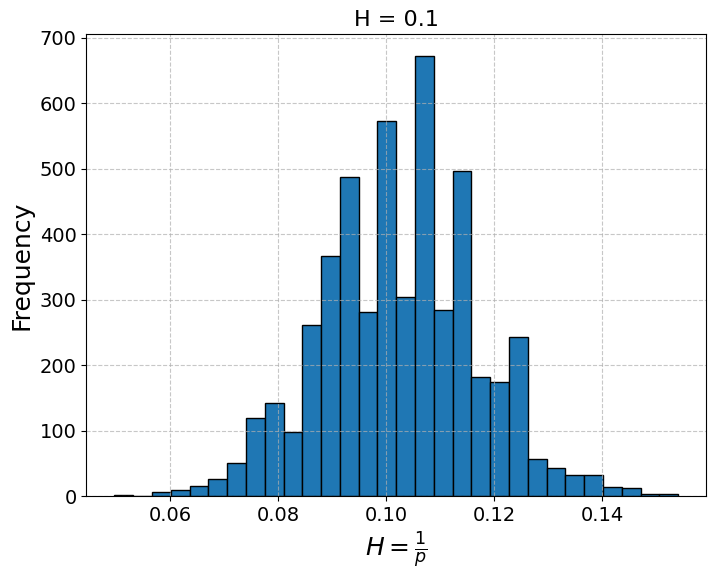

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(hist_result_01, bins=30, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('H = ' + str(H), fontsize=16)
plt.xlabel(r'$H = \frac{1}{p}$', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# plt.savefig('Histogram_0_1.png', bbox_inches='tight')

# Show the histogram
plt.show()

## H = 0.2

In [14]:
n_points = 300*300
H = 0.2
T = 1
K_step = int(np.sqrt(n_points))

n_samples = 5000
hist_result_02 = np.zeros(n_samples)

for j in tqdm(range(hist_result_02.size)):
    # print(j)
    f = FBM(n = n_points, hurst = H, length = T, method = 'daviesharte')
    fbm = f.fbm()
    
    X_L = fbm 
    t_L = f.times()
    X_K = X_L[np.arange(0, t_L.size, K_step)]
    t_K = t_L[np.arange(0, t_L.size, K_step)]
    
    p_vals = np.linspace(1/0.25, 1/0.15, 100)
    W_vals = np.zeros(p_vals.size)
    
    for i in range(p_vals.size):
        W_vals[i] = normalized_p_variation(t_L, X_L, t_K, X_K, p_vals[i])

    hist_result_02[j] = 1/p_vals[np.argmin(np.abs(np.log(W_vals)))]

  0%|          | 0/5000 [00:00<?, ?it/s]

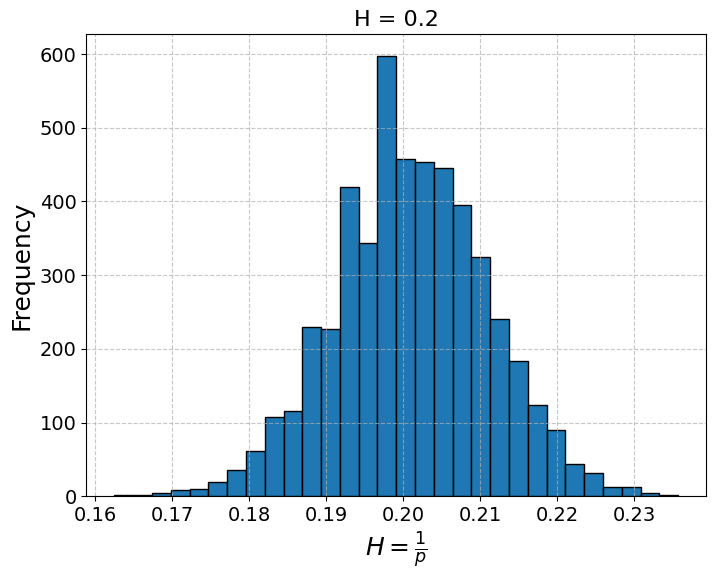

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(hist_result_02, bins=30, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('H = ' + str(H), fontsize=16)
plt.xlabel(r'$H = \frac{1}{p}$', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.grid(True, linestyle='--', alpha=0.7)


# plt.savefig('Histogram_0_2.png', bbox_inches='tight')

# Show the histogram
plt.show()

## H = 0.3

In [16]:
n_points = 300*300
H = 0.3
T = 1
K_step = int(np.sqrt(n_points))

n_samples = 5000
hist_result_03 = np.zeros(n_samples)

for j in tqdm(range(hist_result_03.size)):
    # print(j)
    f = FBM(n = n_points, hurst = H, length = T, method = 'daviesharte')
    fbm = f.fbm()
    
    X_L = fbm 
    t_L = f.times()
    X_K = X_L[np.arange(0, t_L.size, K_step)]
    t_K = t_L[np.arange(0, t_L.size, K_step)]
    
    p_vals = np.linspace(1/0.34, 1/0.25, 100)
    W_vals = np.zeros(p_vals.size)
    
    for i in range(p_vals.size):
        W_vals[i] = normalized_p_variation(t_L, X_L, t_K, X_K, p_vals[i])

    hist_result_03[j] = 1/p_vals[np.argmin(np.abs(np.log(W_vals)))]

  0%|          | 0/5000 [00:00<?, ?it/s]

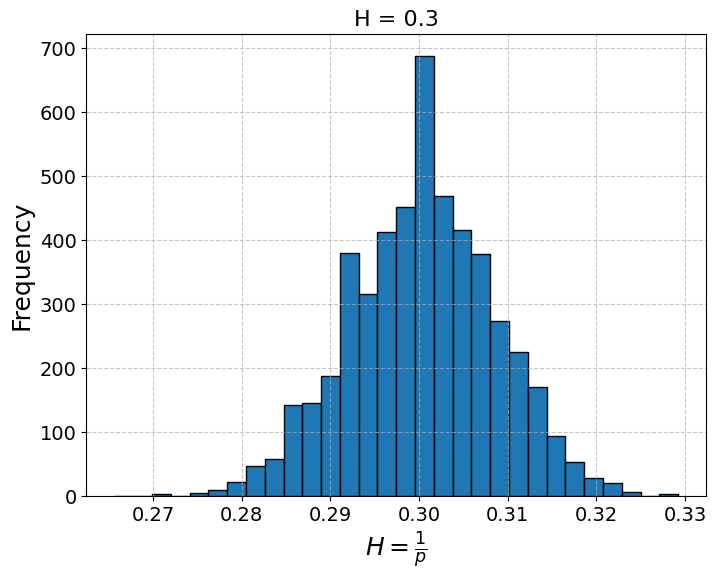

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(hist_result_03, bins=30, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('H = ' + str(H), fontsize=16)
plt.xlabel(r'$H = \frac{1}{p}$', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# plt.savefig('Histogram_0_3.png', bbox_inches='tight')

# Show the histogram
plt.show()

## H = 0.4

In [18]:
n_points = 300*300
H = 0.4
T = 1
K_step = int(np.sqrt(n_points))

n_samples = 5000
hist_result_04 = np.zeros(n_samples)

for j in tqdm(range(hist_result_04.size)):
    # print(j)
    f = FBM(n = n_points, hurst = H, length = T, method = 'daviesharte')
    fbm = f.fbm()
    
    X_L = fbm 
    t_L = f.times()
    X_K = X_L[np.arange(0, t_L.size, K_step)]
    t_K = t_L[np.arange(0, t_L.size, K_step)]
    
    p_vals = np.linspace(1/0.45, 1/0.35, 100)
    W_vals = np.zeros(p_vals.size)
    
    for i in range(p_vals.size):
        W_vals[i] = normalized_p_variation(t_L, X_L, t_K, X_K, p_vals[i])

    hist_result_04[j] = 1/p_vals[np.argmin(np.abs(np.log(W_vals)))]

  0%|          | 0/5000 [00:00<?, ?it/s]

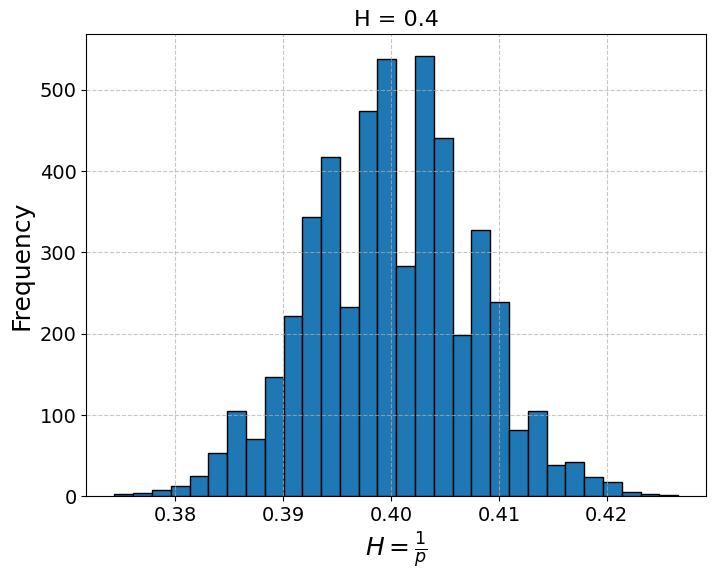

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(hist_result_04, bins=30, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('H = ' + str(H), fontsize=16)
plt.xlabel(r'$H = \frac{1}{p}$', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# plt.savefig('Histogram_0_4.png', bbox_inches='tight')


# Show the histogram
plt.show()

## H = 0.5

In [20]:
n_points = 300*300
H = 0.5
T = 1
K_step = int(np.sqrt(n_points))

n_samples = 5000
hist_result_05 = np.zeros(n_samples)

for j in tqdm(range(hist_result_05.size)):
    # print(j)
    f = FBM(n = n_points, hurst = H, length = T, method = 'daviesharte')
    fbm = f.fbm()
    
    X_L = fbm 
    t_L = f.times()
    X_K = X_L[np.arange(0, t_L.size, K_step)]
    t_K = t_L[np.arange(0, t_L.size, K_step)]
    
    p_vals = np.linspace(1/0.55, 1/0.45, 100)
    W_vals = np.zeros(p_vals.size)
    
    for i in range(p_vals.size):
        W_vals[i] = normalized_p_variation(t_L, X_L, t_K, X_K, p_vals[i])

    hist_result_05[j] = 1/p_vals[np.argmin(np.abs(np.log(W_vals)))]

  0%|          | 0/5000 [00:00<?, ?it/s]

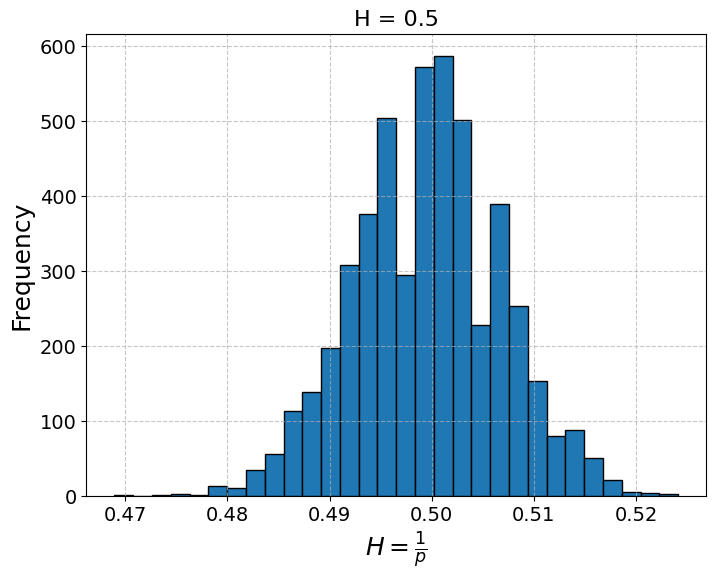

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(hist_result_05, bins=30, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('H = ' + str(H), fontsize=16)
plt.xlabel(r'$H = \frac{1}{p}$', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# plt.savefig('Histogram_0_5.png', bbox_inches='tight')

# Show the histogram
plt.show()

## H = 0.6

In [23]:
n_points = 300*300
H = 0.6
T = 1
K_step = int(np.sqrt(n_points))

n_samples = 5000
hist_result_06 = np.zeros(n_samples)

for j in tqdm(range(hist_result_06.size)):
    # print(j)
    f = FBM(n = n_points, hurst = H, length = T, method = 'daviesharte')
    fbm = f.fbm()
    
    X_L = fbm 
    t_L = f.times()
    X_K = X_L[np.arange(0, t_L.size, K_step)]
    t_K = t_L[np.arange(0, t_L.size, K_step)]
    
    p_vals = np.linspace(1/0.65, 1/0.54, 100)
    W_vals = np.zeros(p_vals.size)
    
    for i in range(p_vals.size):
        W_vals[i] = normalized_p_variation(t_L, X_L, t_K, X_K, p_vals[i])

    hist_result_06[j] = 1/p_vals[np.argmin(np.abs(np.log(W_vals)))]

  0%|          | 0/5000 [00:00<?, ?it/s]

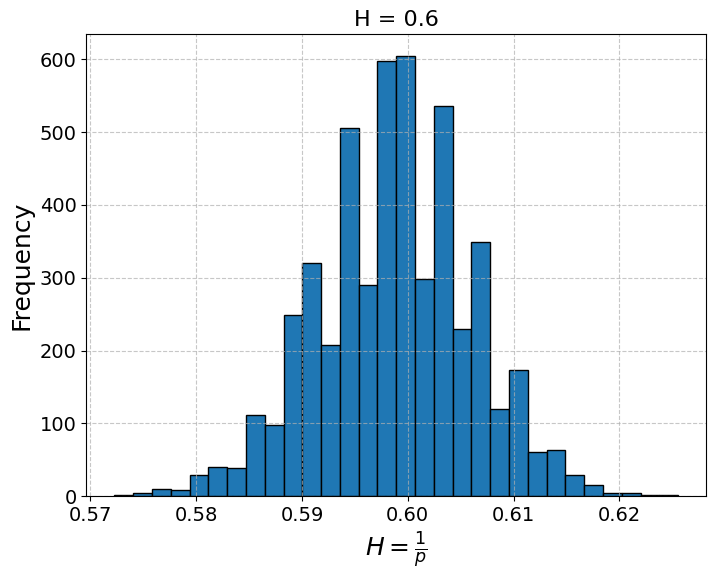

In [24]:
plt.figure(figsize=(8, 6))
plt.hist(hist_result_06, bins=30, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('H = ' + str(H), fontsize=16)
plt.xlabel(r'$H = \frac{1}{p}$', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# plt.savefig('Histogram_0_6.png', bbox_inches='tight')


# Show the histogram
plt.show()

## H = 0.7

In [25]:
n_points = 300*300
H = 0.7
T = 1
K_step = int(np.sqrt(n_points))

n_samples = 5000
hist_result_07 = np.zeros(n_samples)

for j in tqdm(range(hist_result_07.size)):
    # print(j)
    f = FBM(n = n_points, hurst = H, length = T, method = 'daviesharte')
    fbm = f.fbm()
    
    X_L = fbm 
    t_L = f.times()
    X_K = X_L[np.arange(0, t_L.size, K_step)]
    t_K = t_L[np.arange(0, t_L.size, K_step)]
    
    p_vals = np.linspace(1/0.75, 1/0.64, 100)
    W_vals = np.zeros(p_vals.size)
    
    for i in range(p_vals.size):
        W_vals[i] = normalized_p_variation(t_L, X_L, t_K, X_K, p_vals[i])

    hist_result_07[j] = 1/p_vals[np.argmin(np.abs(np.log(W_vals)))]

  0%|          | 0/5000 [00:00<?, ?it/s]

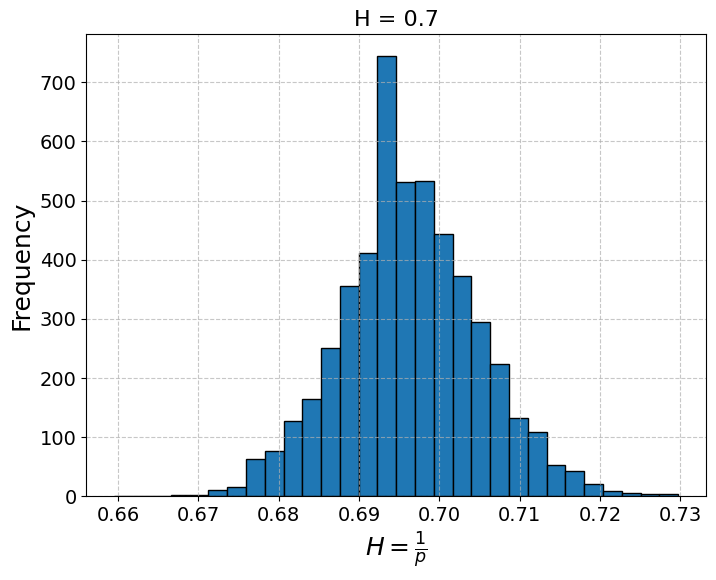

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(hist_result_07, bins=30, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('H = ' + str(H), fontsize=16)
plt.xlabel(r'$H = \frac{1}{p}$', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.grid(True, linestyle='--', alpha=0.7)


# plt.savefig('Histogram_0_7.png', bbox_inches='tight')

# Show the histogram
plt.show()

## H = 0.8

In [27]:
n_points = 300*300
H = 0.8
T = 1
K_step = int(np.sqrt(n_points))

n_samples = 5000
hist_result_08 = np.zeros(n_samples)

for j in tqdm(range(hist_result_08.size)):
    # print(j)
    f = FBM(n = n_points, hurst = H, length = T, method = 'daviesharte')
    fbm = f.fbm()
    
    X_L = fbm 
    t_L = f.times()
    X_K = X_L[np.arange(0, t_L.size, K_step)]
    t_K = t_L[np.arange(0, t_L.size, K_step)]
    
    p_vals = np.linspace(1/0.89, 1/0.73, 100)
    W_vals = np.zeros(p_vals.size)
    
    for i in range(p_vals.size):
        W_vals[i] = normalized_p_variation(t_L, X_L, t_K, X_K, p_vals[i])

    hist_result_08[j] = 1/p_vals[np.argmin(np.abs(np.log(W_vals)))]

  0%|          | 0/5000 [00:00<?, ?it/s]

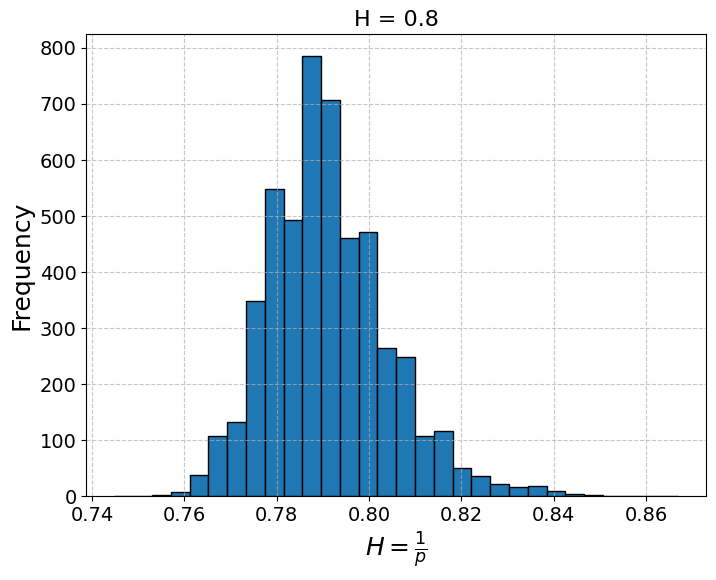

In [28]:
plt.figure(figsize=(8, 6))
plt.hist(hist_result_08, bins=30, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('H = ' + str(H), fontsize=16)
plt.xlabel(r'$H = \frac{1}{p}$', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# plt.savefig('Histogram_0_8.png', bbox_inches='tight')

# Show the histogram
plt.show()

## H = 0.9

In [29]:
n_points = 300*300
H = 0.9
T = 1
K_step = int(np.sqrt(n_points))

n_samples = 5000
hist_result_09 = np.zeros(n_samples)

for j in tqdm(range(hist_result_09.size)):
    # print(j)
    f = FBM(n = n_points, hurst = H, length = T, method = 'daviesharte')
    fbm = f.fbm()
    
    X_L = fbm 
    t_L = f.times()
    X_K = X_L[np.arange(0, t_L.size, K_step)]
    t_K = t_L[np.arange(0, t_L.size, K_step)]
    
    p_vals = np.linspace(1/0.83, 1/0.99, 100)
    W_vals = np.zeros(p_vals.size)
    
    for i in range(p_vals.size):
        W_vals[i] = normalized_p_variation(t_L, X_L, t_K, X_K, p_vals[i])

    hist_result_09[j] = 1/p_vals[np.argmin(np.abs(np.log(W_vals)))]

  0%|          | 0/5000 [00:00<?, ?it/s]

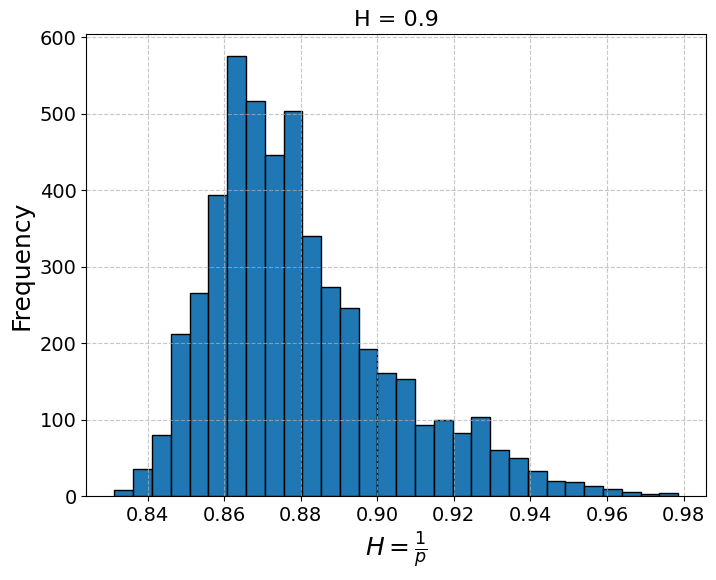

In [30]:
plt.figure(figsize=(8, 6))
plt.hist(hist_result_09, bins=30, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('H = ' + str(H), fontsize=16)
plt.xlabel(r'$H = \frac{1}{p}$', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# plt.savefig('Histogram_0_9.png', bbox_inches='tight')


# Show the histogram
plt.show()

## Summary statistic for estimated roughness index $\hat{H}_{L, K}$ for fBm $B^H$ with L = 300 x 300, K = 300

### Basic statistics

In [35]:
import pandas as pd
statistics01 = pd.DataFrame(hist_result_01).describe()
statistics02 = pd.DataFrame(hist_result_02).describe()
statistics03 = pd.DataFrame(hist_result_03).describe()
statistics04 = pd.DataFrame(hist_result_04).describe()
statistics05 = pd.DataFrame(hist_result_05).describe()
statistics06 = pd.DataFrame(hist_result_06).describe()
statistics07 = pd.DataFrame(hist_result_07).describe()
statistics08 = pd.DataFrame(hist_result_08).describe()
statistics09 = pd.DataFrame(hist_result_09).describe()

In [37]:
print(statistics01)
print(statistics02)
print(statistics03)
print(statistics04)
print(statistics05)
print(statistics06)
print(statistics07)
print(statistics08)
print(statistics09)

                 0
count  5000.000000
mean      0.102569
std       0.014487
min       0.049685
25%       0.092493
50%       0.103348
75%       0.112943
max       0.154099
                 0
count  5000.000000
mean      0.200957
std       0.009861
min       0.162473
25%       0.194882
50%       0.201220
75%       0.207983
max       0.235714
                 0
count  5000.000000
mean      0.300434
std       0.008216
min       0.265625
25%       0.294953
50%       0.300643
75%       0.306557
max       0.329225
                 0
count  5000.000000
mean      0.400142
std       0.007504
min       0.374370
25%       0.395247
50%       0.400321
75%       0.405527
max       0.426607
                 0
count  5000.000000
mean      0.499543
std       0.007150
min       0.468947
25%       0.494501
50%       0.499541
75%       0.504686
max       0.524118
                 0
count  5000.000000
mean      0.598702
std       0.007296
min       0.572283
25%       0.593797
50%       0.598295
75%       0.

### Variance, bias and MSE

In [53]:
var_01 = np.var(hist_result_01)
bias_01 = np.mean(hist_result_01) - 0.1
mse_01 = var_01 + bias_01**2

print('var_01 = ' + str(var_01))
print('bias_01 = ' + str(bias_01))
print('mse_01 = ' + str(mse_01))

var_02 = np.var(hist_result_02)
bias_02 = np.mean(hist_result_02) - 0.2
mse_02 = var_02 + bias_02**2

print('var_02 = ' + str(var_02))
print('bias_02 = ' + str(bias_02))
print('mse_02 = ' + str(mse_02))

var_01 = 0.00020982013529066414
bias_01 = 0.002568809097861821
mse_01 = 0.0002164189154719218
var_02 = 9.722889004356282e-05
bias_02 = 0.0009569706022068136
mse_02 = 9.814468277705088e-05


In [52]:
true_H = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
hist_results = [hist_result_01, hist_result_02, hist_result_03, hist_result_04,
                hist_result_05, hist_result_06, hist_result_07, hist_result_08, hist_result_09]

# Initialize dictionaries to store results
variance = {}
bias = {}
mse = {}

# Calculate variance, bias, and MSE for each true H value
for i, h in enumerate(true_H):
    estimates = hist_results[i]
    var_h = np.var(estimates)
    bias_h = np.mean(estimates) - h
    mse_h = var_h + bias_h**2
    
    variance[h] = var_h
    bias[h] = bias_h
    mse[h] = mse_h

# Print results
for h in true_H:
    print(f'H = {h}: Variance = {variance[h]}, Bias = {bias[h]}, MSE = {mse[h]}')

H = 0.1: Variance = 0.00020982013529066414, Bias = 0.002568809097861821, MSE = 0.0002164189154719218
H = 0.2: Variance = 9.722889004356282e-05, Bias = 0.0009569706022068136, MSE = 9.814468277705088e-05
H = 0.3: Variance = 6.748417445301549e-05, Bias = 0.00043420760095103095, MSE = 6.767271069373914e-05
H = 0.4: Variance = 5.6297278695832274e-05, Bias = 0.00014216104513353756, MSE = 5.6317488458585736e-05
H = 0.5: Variance = 5.1113378475466885e-05, Bias = -0.0004566719093877514, MSE = 5.132192770829074e-05
H = 0.6: Variance = 5.3226931352064096e-05, Bias = -0.0012980767477016597, MSE = 5.4911934594987816e-05
H = 0.7: Variance = 7.496654958444044e-05, Bias = -0.0036388788924506255, MSE = 8.820798917836314e-05
H = 0.8: Variance = 0.00017163350846537164, Bias = -0.008916921100614705, MSE = 0.0002511449903799594
H = 0.9: Variance = 0.0005629067638530199, Bias = -0.020143039369889815, MSE = 0.0009686487989099509
